# Práctica de laboratorio: Regresión lineal simple en Python 


## Estudiante Santiago Tene


### Objetivos
En esta práctica de laboratorio se familiarizará con los conceptos de la regresión lineal simple y aprenderá a trabajar con los datos provistos para realizar una predicción. 
<li>**Parte 1: Importar las bibliotecas y los datos **</li>
<li>**Parte 2: Graficar los datos **</li>
<li>** Parte 3: Realizar una regresión lineal simple **</li>
### Aspectos básicos/situación
En estadística, la regresión lineal es una forma de modelar una relación entre variables dependientes $y$ y variables independientes $x$.

En esta práctica de laboratorio, analizará los datos de ventas del distrito y realizará una regresión lineal simple para predecir las ventas netas anuales según la cantidad de tiendas en el distrito.
### Recursos necesarios
* 1 computadora con acceso a Internet
* Bibliotecas de Python: 'pandas', 'numpy', 'scipy' y 'matplotlib'
* Archivos de datos: stores-dist.csv

## Parte 1: Importar las bibliotecas y los datos

En esta parte, importará las bibliotecas y los datos del archivo 'stores-dist.csv'.

#### Paso 1: Importar las bibliotecas.

En este paso, importará las bibliotecas siguientes:

* 'matplotlib.pyplot' como plt
* 'numpy' como np
* 'pandas' como pd

In [1]:
# Code Cell 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Paso 2: Importar los datos.

En este paso, importará los datos del archivo 'stores-dist.csv' y verificará que el archivo se haya importado correctamente.

In [2]:
# Code Cell 2

# Import the file, stores-dist.csv
salesDist = pd.read_csv('stores-dist.csv')

# Verify the imported data
salesDist.head()

,district,annual net sales,number of stores in district
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


Los encabezados de las columnas 'ventas netas anuales' y 'número de tiendas en el distrito' se renombran para facilitar el procesamiento de los datos.

* 'ventas netas anuales' a ventas
* 'número de tiendas en el distrito' a tiendas

In [3]:
# Code Cell 3
# The district column has no relevance at this time, so it can be dropped.
salesDist = salesDist.rename(columns={'annual net sales':'sales','number of stores in district':'stores'})
salesDist.head()

,district,sales,stores
0,1,231.0,12
1,2,156.0,13
2,3,10.0,16
3,4,519.0,2
4,5,437.0,6


## Parte 2: Graficar los datos

### Paso 1: Determinar la correlación.

En este paso, investigará la correlación de los datos antes del análisis de regresión. También descartará cualquier columna sin relación según sea necesario. 

In [16]:
# Code Cell 4
# Check correlation of data prior to doing the analysis
# # Hint: check lab 3.1.5.5
salesDist.corr()

,district,sales,stores
district,1.000000,0.136103,-0.230617
sales,0.136103,1.000000,-0.912236
stores,-0.230617,-0.912236,1.000000


Según el coeficiente de correlación, parece que la columna 'district' (distrito) tiene correlación baja con 'annual net sales' (ventas netas anuales) y 'number of stores in the district' (cantidad de tiendas en el distrito). La columna del distrito no es necesaria como parte del análisis de regresión. La columna ‘district’ (distrito) se puede descartar de la estructura de datos.

In [15]:
# Code Cell 5
# The district column has no relevance at this time, so it can be dropped.
sales = salesDist.drop('district',axis=1)

sales.head()

,sales,stores
0,231.0,12
1,156.0,13
2,10.0,16
3,519.0,2
4,437.0,6


De los datos del coeficiente de correlación, ¿qué tipo de asignación observó entre las ventas netas anuales y la cantidad de tiendas en el distrito?

NO estan correlacionadas, ya que la correlación es de menos de 0.9

### Paso 2: Crear el gráfico.

En este paso, creará un gráfico para visualizar datos. También asignará tiendas como variable independiente $x$ y ventas como variable dependiente $y$.

In [6]:
# Code Cell 6
# dependent variable for y axis
y = sales['sales']
# independent variable for x axis
x = sales.stores

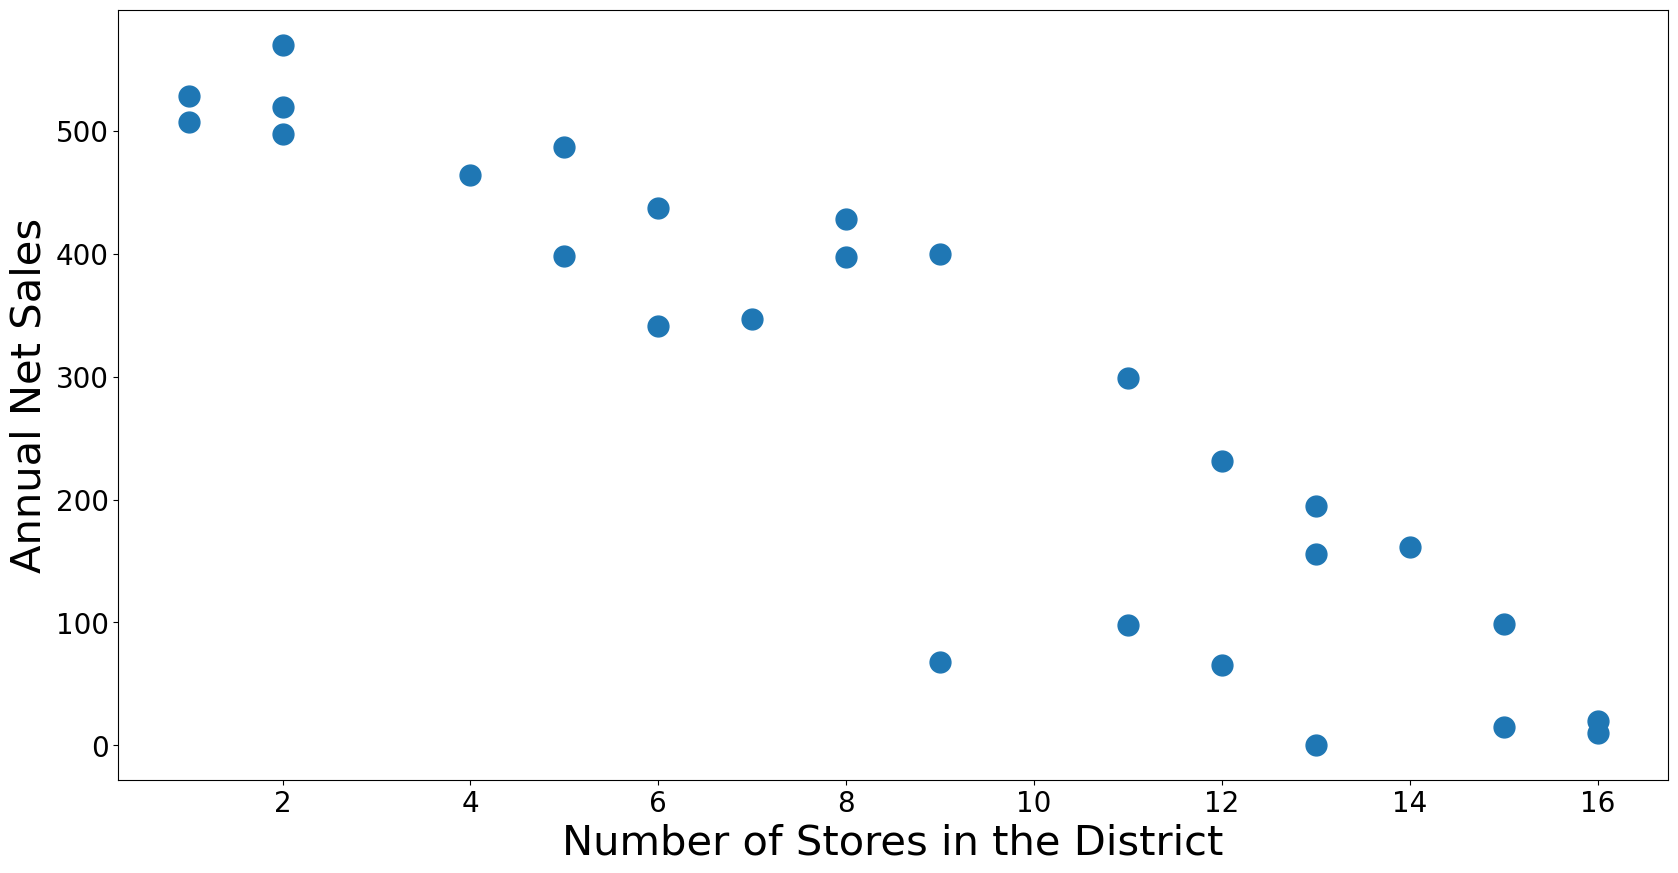

In [7]:
# Code Cell 7
# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(x,y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in the District', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

## Parte 3: Realizar una regresión lineal simple

En esta parte, utilizará numpy para generar una línea de regresión para los datos analizados. También calculará el centroide para este conjunto de datos. El centroide es la media del conjunto de datos. La línea de regresión lineal simple generada también debe atravesar el centroide.

### Paso 1: Calcular la pendiente y la intersección Y de la línea de regresión lineal.

In [8]:
# Code Cell 8
# Use numpy polyfit for linear regression to fit the data
# Generate the slope of the line (m)
# Generate the y-intercept (b)
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m))
print ('The y-intercept is {:.2f}.'.format(b))
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b))

The slope of line is -35.79.
The y-intercept is 599.38.
The best fit simple linear regression line is -35.79x + 599.38.


### Paso 2: Calcular el centroide.

El centroide del conjunto de datos se calcula utilizando la función promedio.

In [9]:
# Code Cell 9
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 8.74 and y = 286.57.


### Paso 3: Superponer la línea de regresión y el punto del centroide en el gráfico.

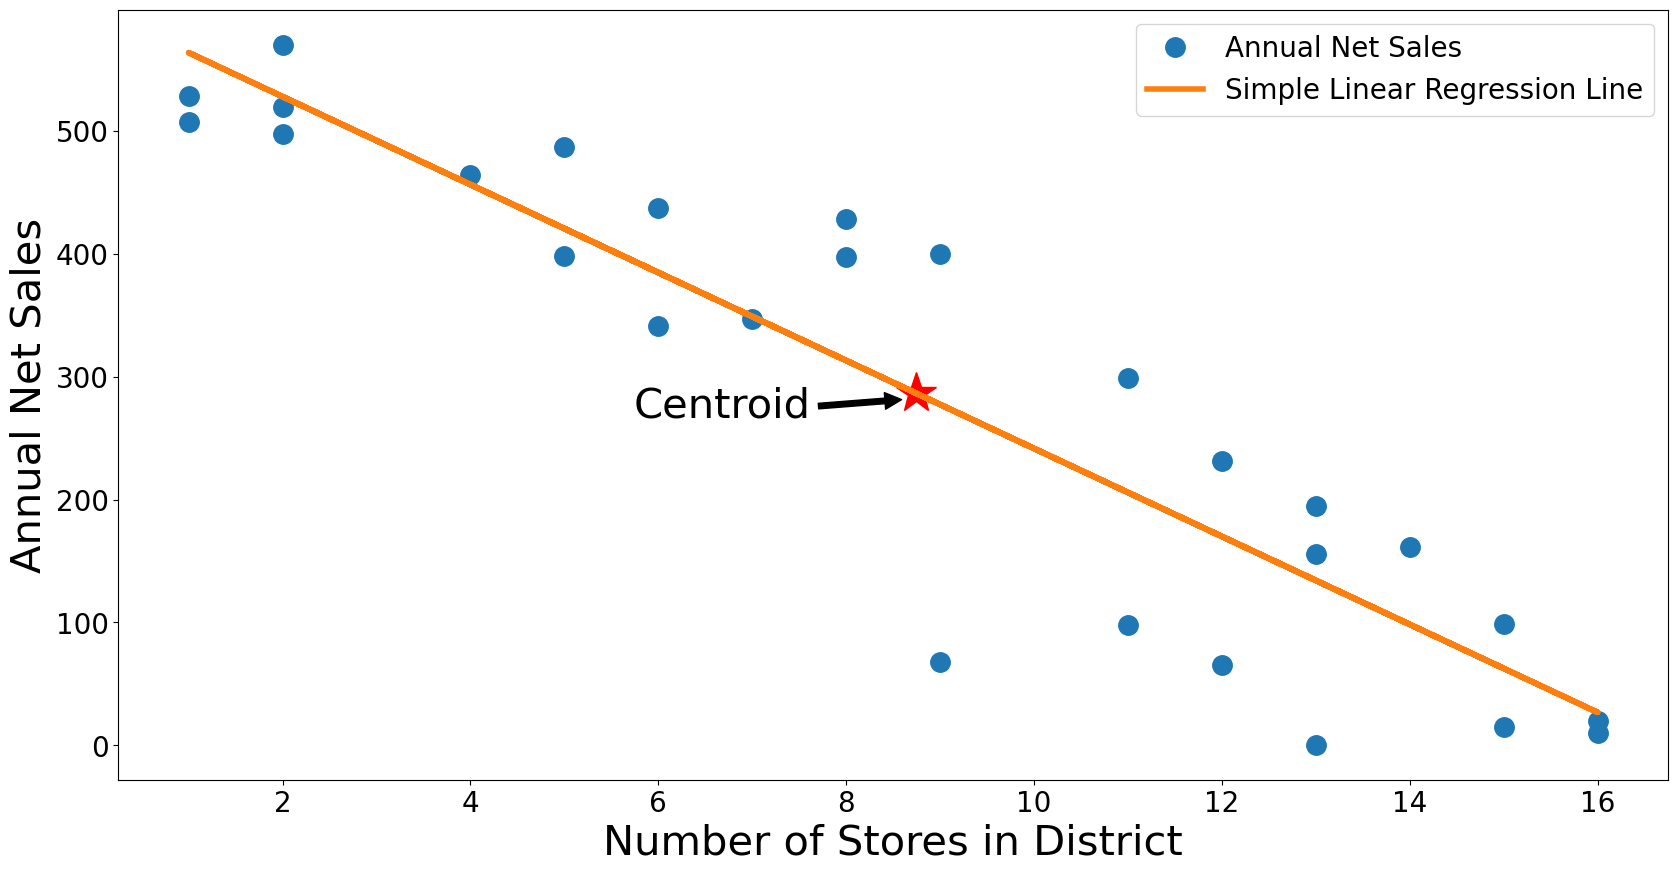

In [11]:
# Code Cell 10
# Create the plot inline
%matplotlib inline

# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'o', markersize = 14, label = "Annual Net Sales") 

# Plot the centroid point
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Annual Net Sales', fontsize = 30)
plt.xlabel('Number of Stores in District', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)

# Create legend
plt.legend(loc = 'upper right', fontsize = 20)

### Paso 4: Predicción

Con la línea de regresión lineal, puede predecir las ventas netas anuales según la cantidad de tiendas en el distrito.

In [12]:
# Code Cell 11
# Function to predict the net sales from the regression line
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must have at least 1 store in the district to predict the annual net sales.")

In [13]:
# Code Cell 12
# Enter the number of stores in the function to generate the net sales prediction.
predict(4)

456.2313681207653

¿Cuál es la venta neta previsible si hay 4 tiendas en el distrito?

Si existe 4 tiendas en el distrito se prevee o se predice ventas netas de 456.2313681207653

<font size='0.5'>&copy; 2017 Cisco y/o sus filiales. Todos los derechos reservados. Este documento es información pública de Cisco.<font>